In [526]:
from tsdata.raw import available_data, load_data

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams["figure.figsize"] = (18, 8)

import scipy.stats as st
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.distributions.empirical_distribution import ECDF

from sklearn.metrics import mean_absolute_error #r2_score, median_absolute_error, 

import warnings
warnings.filterwarnings('ignore')

In [415]:
def plot_decomposition(decomposition):
    plt.subplots(3, 1, figsize=(20, 21))

    plt.subplot(3, 1, 1)
    plt.plot(decomposition.trend, color='navy', markersize=3, label='trend')
    plt.legend(loc='upper right')
    plt.grid(linestyle=':', color='k')
    plt.title("Trend")


    plt.subplot(3, 1, 2)
    plt.plot(decomposition.seasonal, 
             '-gd', markersize=3, label='seasonal')
    plt.plot([decomposition.seasonal.index[0], decomposition.seasonal.index[-1]], 
             decomposition.seasonal.mean()*np.array([1, 1]), '--k', 
             label=f"mean = {decomposition.seasonal.mean():.3g}")
    plt.legend(loc='upper right')
    plt.grid(linestyle=':', color='k')
    plt.title(f"Seasonal : range={(decomposition.seasonal.max() - decomposition.seasonal.min()):.3g}")


    plt.subplot(3, 1, 3)
    plt.plot(decomposition.resid, '-o', color='maroon', markersize=3,  label='residuals')
    plt.plot([decomposition.resid.index[0], decomposition.resid.index[-1]], 
             decomposition.resid.mean()*np.array([1, 1]), '--k', 
             label=f"mean = {decomposition.resid.mean():.3g}")
    plt.legend(loc='upper right')
    plt.grid(linestyle=':', color='k')
    plt.title("Residuals")

    plt.show()
    

def correlation_analysis(data, decomposition):
    N = len(data)
    plot_acf(data, 
             lags=N-1, 
             vlines_kwargs={'color' : 'b'},
             markerfacecolor='b', markeredgecolor='b', 
             title='Autocorrelation of target');

    trend = decomposition.trend
    N = len(trend.dropna())
    k = np.arange(0, N)
    plot_acf(trend.dropna(), 
             lags=N-1, 
             vlines_kwargs={'color' : 'navy'}, 
             markerfacecolor='navy', markeredgecolor='navy', 
             title='Autocorrelation of trend');

    seasonal = decomposition.seasonal
    N = len(seasonal)
    plot_acf(seasonal, 
             lags=N-1, 
             vlines_kwargs={'color' : 'g'}, 
             markerfacecolor='g', markeredgecolor='g', 
             title='Autocorrelation of seasonal');

    resid = decomposition.resid
    N = len(resid.dropna())
    plot_acf(resid.dropna(), 
             lags=N-1,   
             vlines_kwargs={'color' : 'maroon'}, 
             markerfacecolor='maroon', markeredgecolor='maroon', 
             title='Autocorrelation of residuals');


    plt.show()
    
    
def partial_autocorrelation(data, decomposition, lags=36):
    plot_pacf(data, 
             lags=lags, 
             vlines_kwargs={'color' : 'b'},
             markerfacecolor='b', markeredgecolor='b', 
             title='Partial autocorrelation of target');

    trend = decomposition.trend
    plot_pacf(trend.dropna(), 
             lags=lags, 
             vlines_kwargs={'color' : 'navy'}, 
             markerfacecolor='navy', markeredgecolor='navy', 
             title='Partial autocorrelation of trend');

    seasonal = decomposition.seasonal
    plot_pacf(seasonal, 
             lags=lags, 
             vlines_kwargs={'color' : 'g'}, 
             markerfacecolor='g', markeredgecolor='g', 
             title='Partial autocorrelation of seasonal');

    resid = decomposition.resid
    plot_pacf(resid.dropna(), 
             lags=lags,   
             vlines_kwargs={'color' : 'maroon'}, 
             markerfacecolor='maroon', markeredgecolor='maroon', 
             title='Partial autocorrelation of residuals');

    plt.show()

In [352]:
print(available_data())

['LakeHuron', 'PBS', 'ansett', 'aus_accommodation', 'aus_airpassengers', 'aus_arrivals', 'aus_livestock', 'aus_production', 'aus_retail', 'bank_calls', 'boston_marathon', 'canadian_gas', 'gafa_stock', 'global_economy', 'guinea_rice', 'hh_budget', 'insurance', 'nyc_bikes', 'olympic_running', 'pedestrian', 'pelt', 'prices', 'prison', 'souvenirs', 'tourism', 'tute1', 'us_change', 'us_employment', 'us_gas_total', 'us_gasoline', 'vic_elec']


# Tasks: 1, 2

Use the help function to explore what the series gafa_stock, PBS, vic_elec and pelt represent.

1. Use autoplot() to plot some of the series in these data sets.
2. What is the time interval of each series?

In [84]:
gafa_stock = load_data('gafa_stock')
PBS = load_data('PBS')
vic_elec = load_data('vic_elec')
pelt = load_data('pelt')

In [23]:
gafa_stock.head()

,Symbol,Date,Open,High,Low,Close,Adj_Close,Volume
0,AAPL,2014-01-02,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
1,AAPL,2014-01-03,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2,AAPL,2014-01-06,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
3,AAPL,2014-01-07,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
4,AAPL,2014-01-08,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [24]:
gafa_stock.Symbol.unique()

array(['AAPL', 'AMZN', 'FB', 'GOOG'], dtype=object)

In [33]:
gafa_stock.Date = pd.to_datetime(gafa_stock.Date)

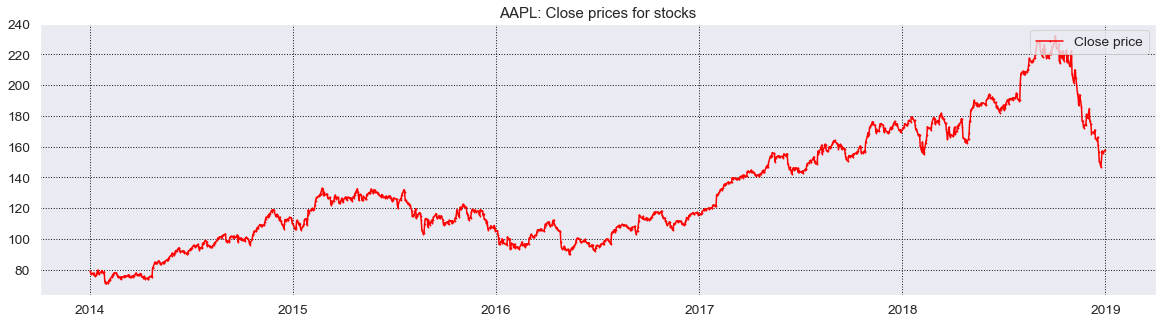

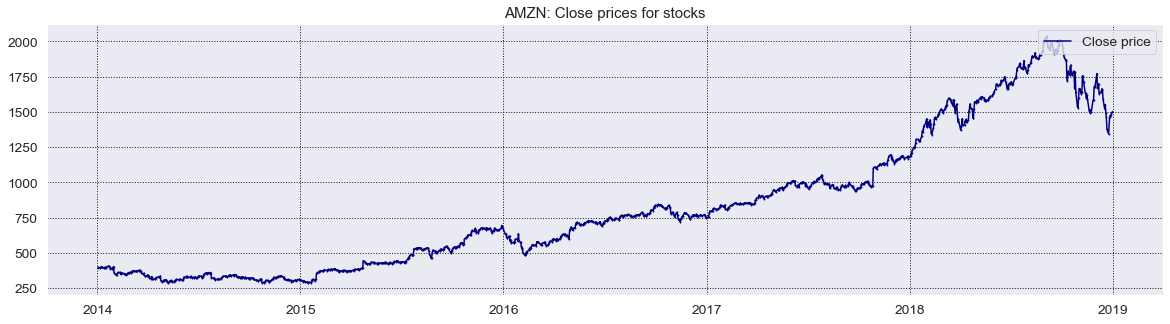

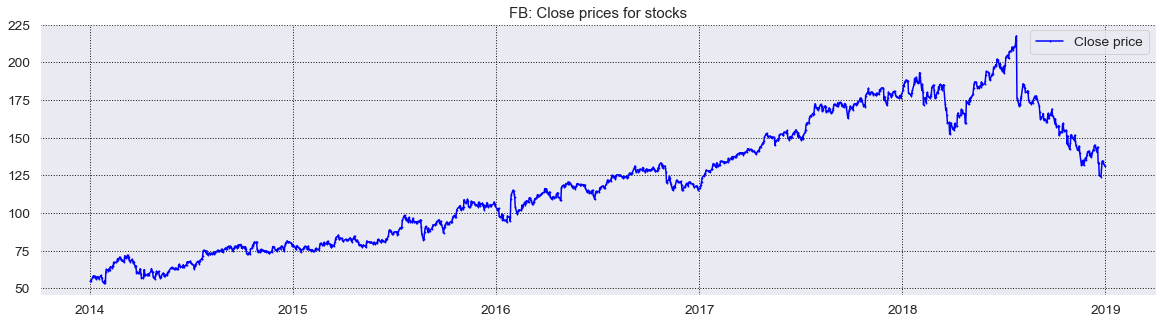

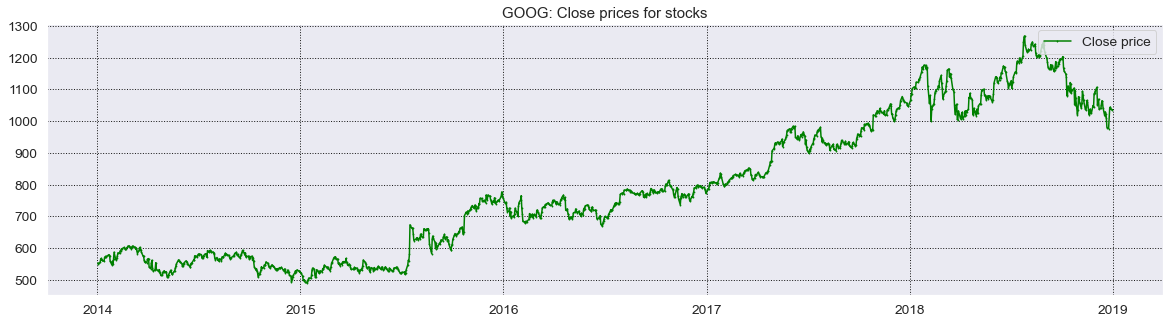

In [56]:
# g = sns.lineplot(data=gafa_stock, x='Date', y='Close', hue='Symbol')

company_names = gafa_stock.Symbol.unique()
n_companies = len(company_names) 
colors = ['red', 'navy', 'blue', 'green']

for color, company_name in zip(colors, company_names):
    plt.figure(figsize=(20, 5))
    x = gafa_stock[gafa_stock.Symbol == company_name]['Date']
    y = gafa_stock[gafa_stock.Symbol == company_name]['Close']
    plt.plot(x, y, '-d', color=color, markersize=1)
    plt.legend(['Close price',], loc='upper right')
    plt.grid(linestyle=':', color='k')
    plt.title(f'{company_name}: Close prices for stocks')

# What is the time interval of each series?
# day interval without weekends

In [57]:
PBS.head()

,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
0,1991 Jul,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877.0
1,1991 Aug,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011.0
2,1991 Sep,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020.0
3,1991 Oct,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222.0
4,1991 Nov,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120.0


In [58]:
PBS[(PBS.Concession == 'Concessional') & (PBS.Type == 'Co-payments') & (PBS.ATC1 == 'A') & (PBS.ATC2_desc == 'STOMATOLOGICAL PREPARATIONS')]

,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
0,1991 Jul,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877.0
1,1991 Aug,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011.0
2,1991 Sep,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020.0
3,1991 Oct,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222.0
4,1991 Nov,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120.0
...,...,...,...,...,...,...,...,...,...
199,2008 Feb,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14818,72128.0
200,2008 Mar,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,13829,67879.0
201,2008 Apr,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,16383,81543.0
202,2008 May,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,13886,70370.0


In [63]:
fig = px.line(PBS[(PBS.Concession == 'Concessional') & (PBS.Type == 'Co-payments') & 
                  (PBS.ATC1 == 'A') & (PBS.ATC2_desc == 'STOMATOLOGICAL PREPARATIONS')], 
              x='Month', y='Cost', title='Cost of STOMATOLOGICAL PREPARATIONS', markers=True)
fig.show()

# monthly interval

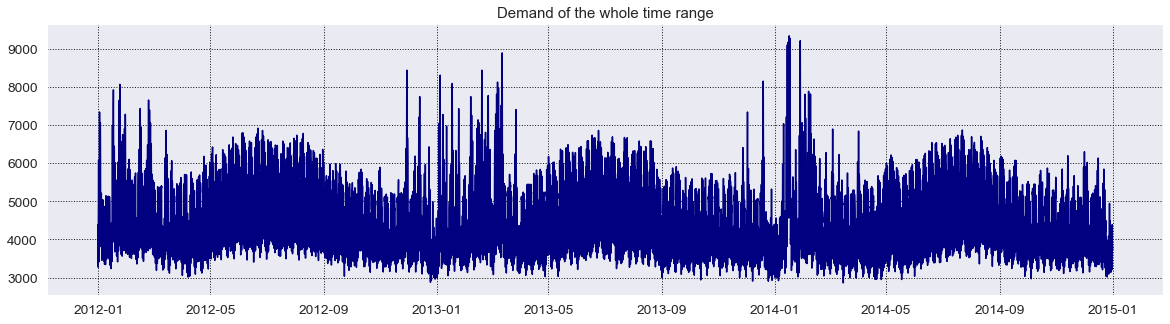

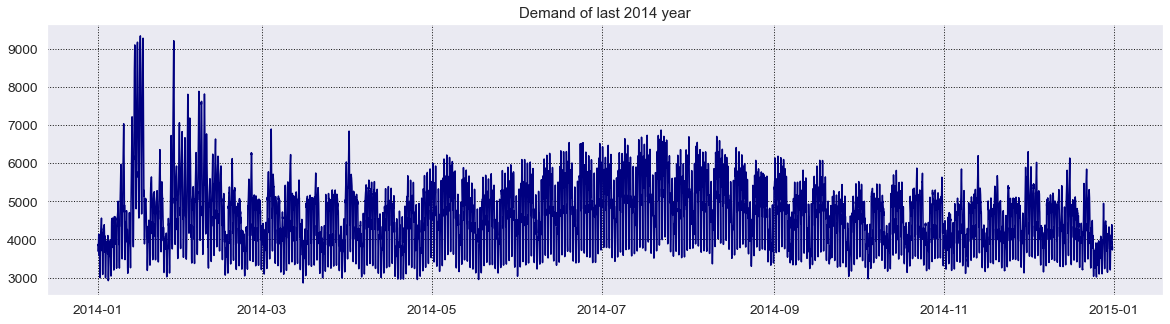

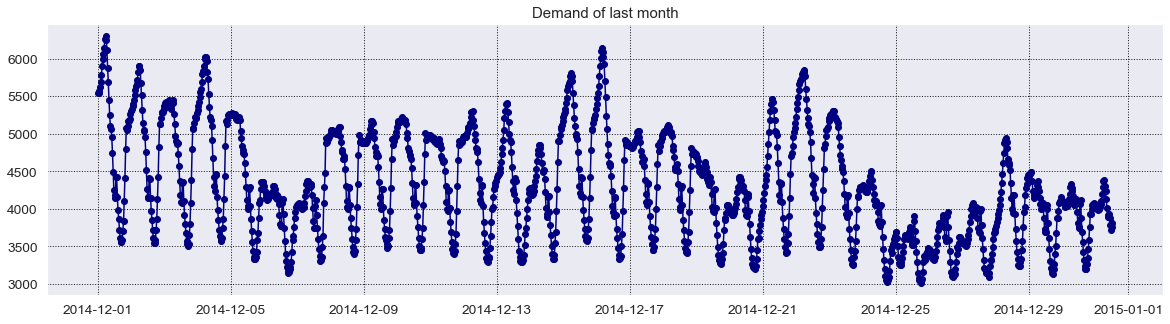

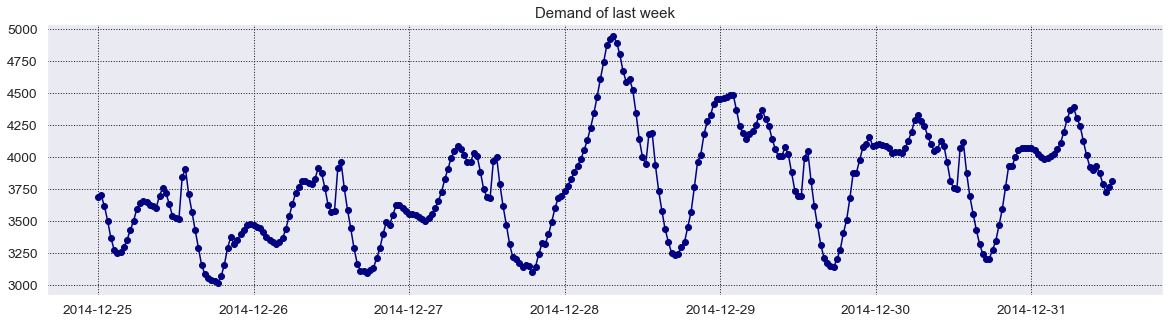

In [101]:
plt.figure(figsize=(20, 5))
plt.plot(vic_elec['Demand'], color='navy')
plt.title('Demand of the whole time range')
plt.grid(linestyle=':', color='k')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(vic_elec.loc['2014-01-01':, 'Demand'], color='navy')
plt.title('Demand of last 2014 year')
plt.grid(linestyle=':', color='k')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(vic_elec.loc['2014-12-01':, 'Demand'], '-o', color='navy')
plt.title('Demand of last month')
plt.grid(linestyle=':', color='k')
plt.show()

plt.figure(figsize=(20, 5));
plt.plot(vic_elec.loc['2014-12-25':, 'Demand'], '-o', color='navy')
plt.title('Demand of last week')
plt.grid(linestyle=':', color='k')
plt.show()

In [102]:
pelt.head()

,Year,Hare,Lynx
0,1845,19580.0,30090.0
1,1846,19600.0,45150.0
2,1847,19610.0,49150.0
3,1848,11990.0,39520.0
4,1849,28040.0,21230.0


In [104]:
fig = px.line(pelt, x='Year', y=['Hare', 'Lynx'],  title='Hare and Lynx changes', markers=True)
fig.show()

# year interval

# Task: 3 

Download the file tute1.csv from the book website, open it in Excel (or some other spreadsheet application), and review its contents. You should find four columns of information. Columns B through D each contain a quarterly series, labelled Sales, AdBudget and GDP. Sales contains the quarterly sales for a small company over the period 1981-2005. AdBudget is the advertising budget and GDP is the gross domestic product. All series have been adjusted for inflation.



In [105]:
tute = pd.read_csv('data/tute.csv')
tute.head()

,Quarter,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1


In [106]:
tute.isna().sum(axis=0)

Quarter     0
Sales       0
AdBudget    0
GDP         0
dtype: int64

In [108]:
fig = px.line(tute, x="Quarter", y=['Sales','AdBudget', 'GDP'], title='Sales, AdBudget, GDP changes')
fig.show()

# Task: 5

Download tourism.xlsx from the book website and read it into R using readxl::read_excel().

1. Create a tsibble which is identical to the tourism tsibble from the tsibble package.
2. Find what combination of Region and Purpose had the maximum number of overnight trips on average.
3. Create a new tsibble which combines the Purposes and Regions, and just has total trips by State.

In [113]:
tourism = pd.read_csv('data/tourism.csv')

In [117]:
tourism

,Quarter,Region,State,Purpose,Trips
0,1998-01-01,Adelaide,South Australia,Business,135.077690
1,1998-04-01,Adelaide,South Australia,Business,109.987316
2,1998-07-01,Adelaide,South Australia,Business,166.034687
3,1998-10-01,Adelaide,South Australia,Business,127.160464
4,1999-01-01,Adelaide,South Australia,Business,137.448533
...,...,...,...,...,...
24315,2016-10-01,Yorke Peninsula,South Australia,Visiting,33.672151
24316,2017-01-01,Yorke Peninsula,South Australia,Visiting,46.223014
24317,2017-04-01,Yorke Peninsula,South Australia,Visiting,50.582837
24318,2017-07-01,Yorke Peninsula,South Australia,Visiting,27.766728


In [118]:
tourism_grouped = tourism.groupby(['Region', 'Purpose']).sum('Trips').reset_index().sort_values('Trips',ascending=False)

In [119]:
tourism_grouped.head()
# Sydney; Visiting

,Region,Purpose,Trips
271,Sydney,Visiting,59781.597453
199,Melbourne,Visiting,49511.803281
268,Sydney,Business,48163.510696
217,North Coast NSW,Holiday,47031.730539
269,Sydney,Holiday,44026.149221


In [120]:
tourism_grouped_by_state = tourism.groupby(['State']).sum('Trips').reset_index().sort_values('Trips',ascending=False)
tourism_grouped_by_state

,State,Trips
1,New South Wales,557367.430368
6,Victoria,390462.911453
3,Queensland,386642.911752
7,Western Australia,147819.653238
4,South Australia,118151.348155
5,Tasmania,54137.094786
0,ACT,41006.585207
2,Northern Territory,28613.683011


# Task 6

Create time plots of the following four time series: Bricks from aus_production, Lynx from pelt, Close from gafa_stock, Demand from vic_elec.

1. Use ? (or help()) to find out about the data in each series.
2. For the last plot, modify the axis labels and title.

In [125]:
aus_production = load_data('aus_production')

# for vic_elec, gafa_stock, pelt check TASK:1, 2

In [128]:
px.line(aus_production, x='Quarter', y='Bricks', title='Quarter bricks production', markers=True)

# Task: 7

The aus_arrivals data set comprises quarterly international arrivals to Australia from Japan, New Zealand, UK and the US.

1. Use autoplot(), gg_season() and gg_subseries() to compare the differences between the arrivals from these four countries.
2. Can you identify any unusual observations?

In [130]:
aus_arrivals = load_data('aus_arrivals')

In [131]:
aus_arrivals.head()

,Quarter,Origin,Arrivals
0,1981 Q1,Japan,14763
1,1981 Q2,Japan,9321
2,1981 Q3,Japan,10166
3,1981 Q4,Japan,19509
4,1982 Q1,Japan,17117


In [135]:
px.line(aus_arrivals, x='Quarter', y='Arrivals', color='Origin', markers=True, title='Number of arrivals to different countries')

# Can you identify any unusual observations?
# I dont see any real outliers in these plots (may be in Japan and NZ there are 2 points with peaks) 

# Taks: 8 

Monthly Australian retail data is provided in aus_retail. Select one of the time series as follows (but choose your own seed value

1. Can you spot any seasonality, cyclicity and trend? What do you learn about the series?



In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [162]:
aus_retail = load_data('aus_retail')

In [163]:
aus_retail

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Apr,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 May,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jun,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jul,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Aug,3.6
...,...,...,...,...,...
64527,Western Australia,Takeaway food services,A3349435A,2018 Aug,178.5
64528,Western Australia,Takeaway food services,A3349435A,2018 Sep,179.8
64529,Western Australia,Takeaway food services,A3349435A,2018 Oct,183.2
64530,Western Australia,Takeaway food services,A3349435A,2018 Nov,183.7


In [164]:
df = aus_retail[aus_retail['Series ID'] == 'A3349849A']
# select one series

In [165]:
px.line(df, x='Month', y='Turnover', markers=False, title='Turnover for A3349849A client')

In [166]:
df.set_index('Month', inplace=True)
df.index = pd.to_datetime(df.index, format='%Y %b')
df = df['Turnover']

In [278]:
decomposition = seasonal_decompose(df['Turnover'], model='additive', period=12)

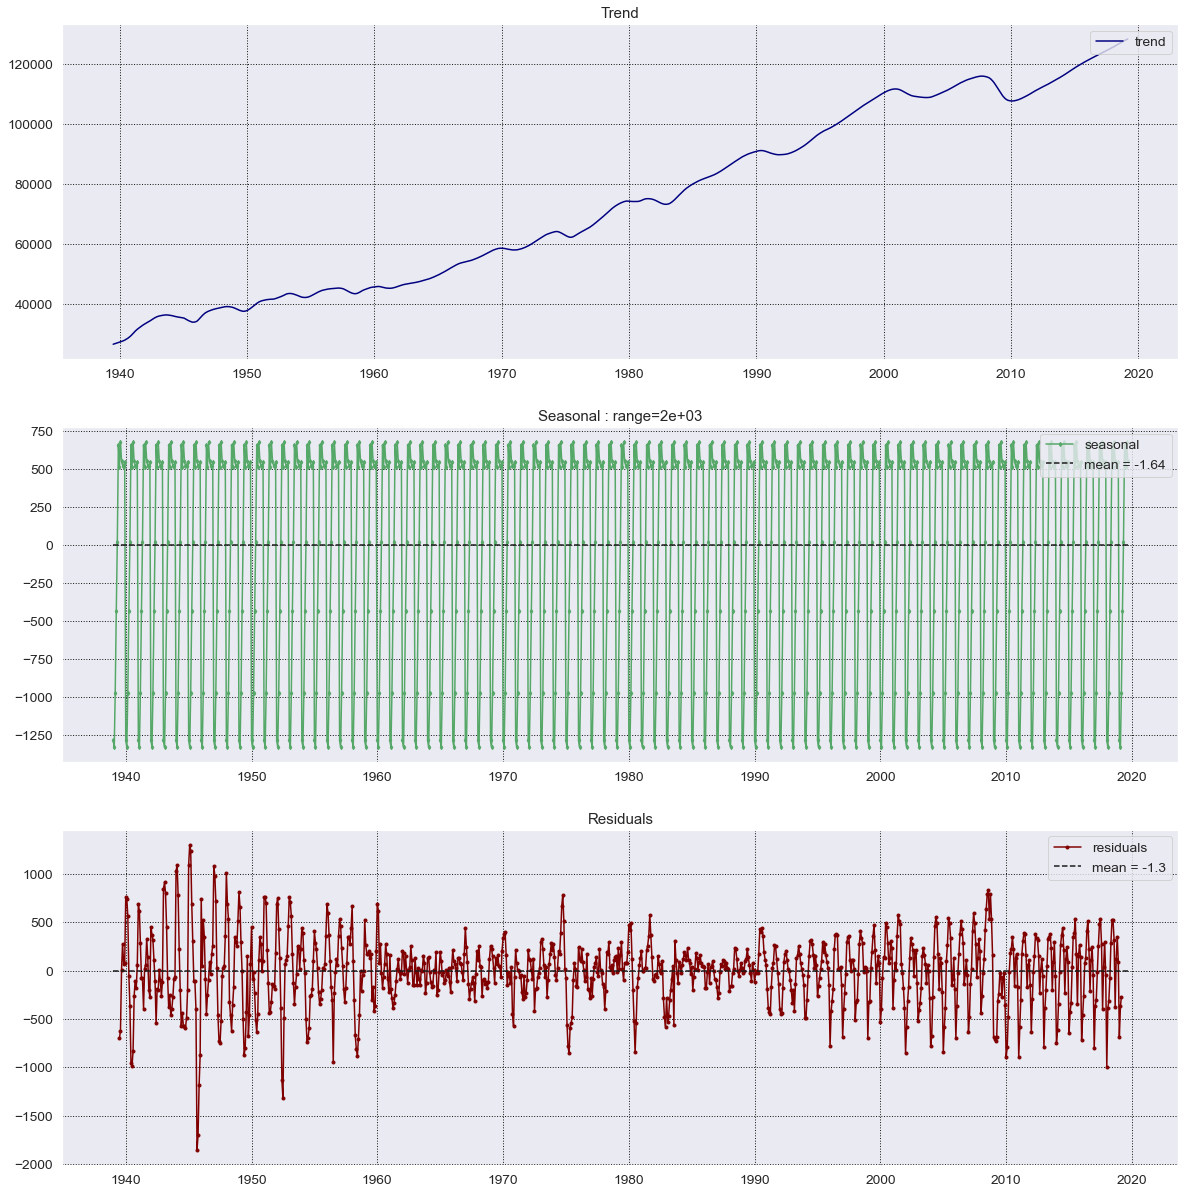

In [345]:
plot_decomposition(decomposition)

In [346]:
# Decomposition detect only trend and seasonal components, so if we have cyclicity component, 
# it will be seen in trend and residual plots

# Task 9

Use the following graphics functions: **autoplot(), gg_season(), gg_subseries(), gg_lag(), ACF()** and explore features from the following time series: 
1. “Total Private” Employed from us_employment,
2. Bricks from aus_production
3. Hare from pelt
4. “H02” Cost from PBS, and us_gasoline.

Questions are:
1. Can you spot any seasonality, cyclicity and trend?
2. What do you learn about the series?
3. What can you say about the seasonal patterns?
4. Can you identify any unusual years?

In [436]:
us_employment = load_data('us_employment')
aus_production = load_data('aus_production')
pelt = load_data('pelt')
PBS = load_data('PBS') 

## us_employment

In [349]:
us_employment_observed = us_employment[us_employment.Title == 'Total Private']
us_employment_observed.Month = pd.to_datetime(us_employment_observed.Month)
us_employment_observed.set_index('Month', inplace=True)
us_employment_observed = us_employment_observed.Employed

In [350]:
px.line(us_employment_observed)

In [369]:
decomposition = seasonal_decompose(us_employment_observed, period=12, model='additive')

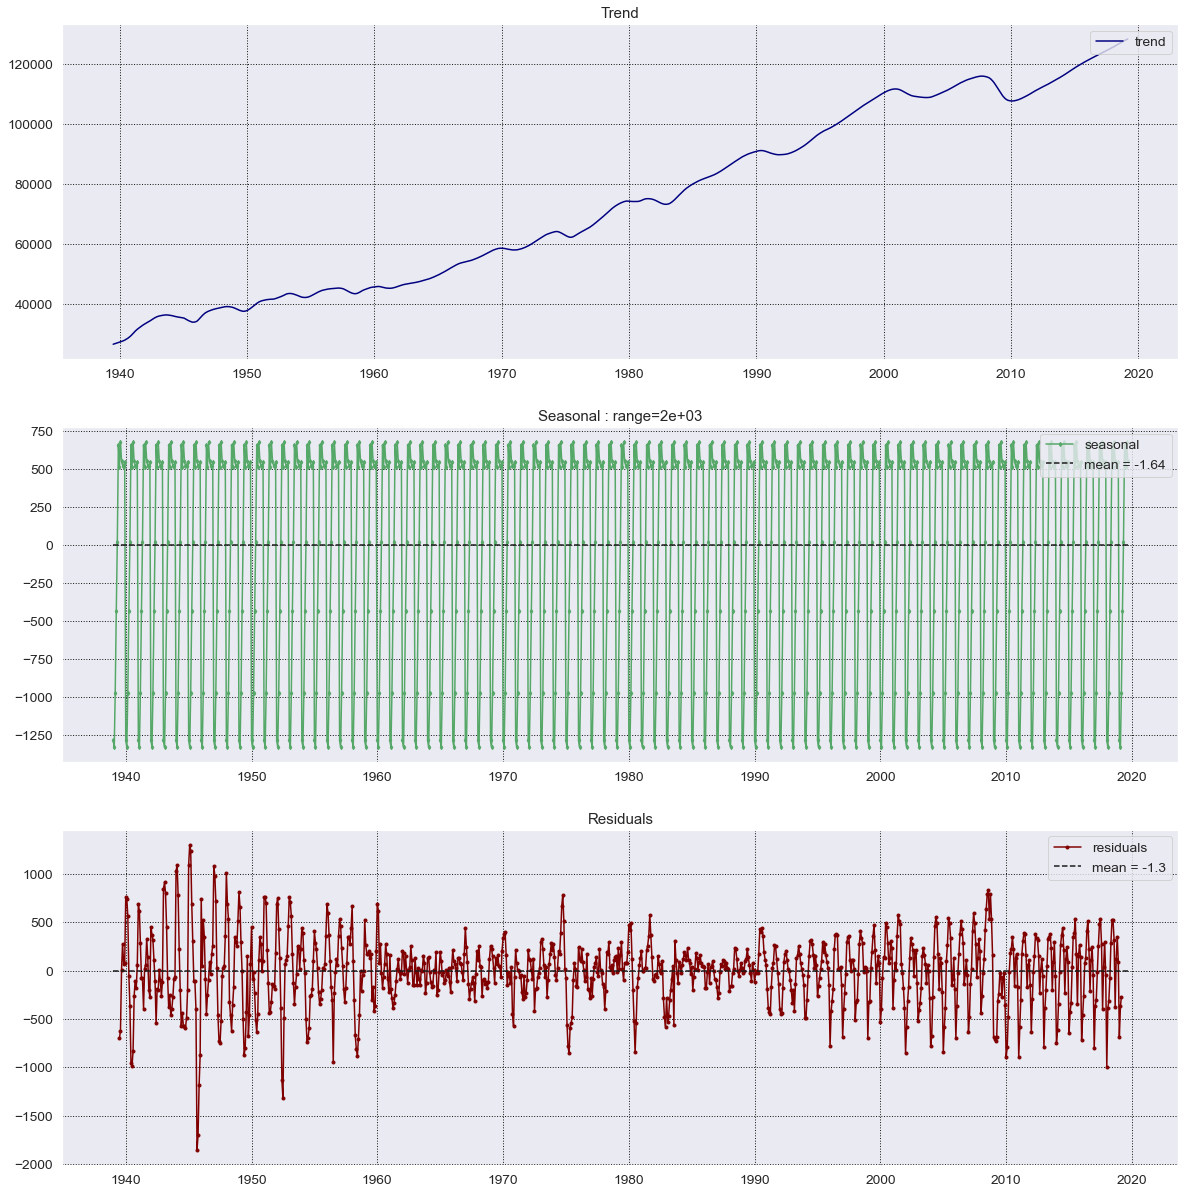

In [370]:
plot_decomposition(decomposition)

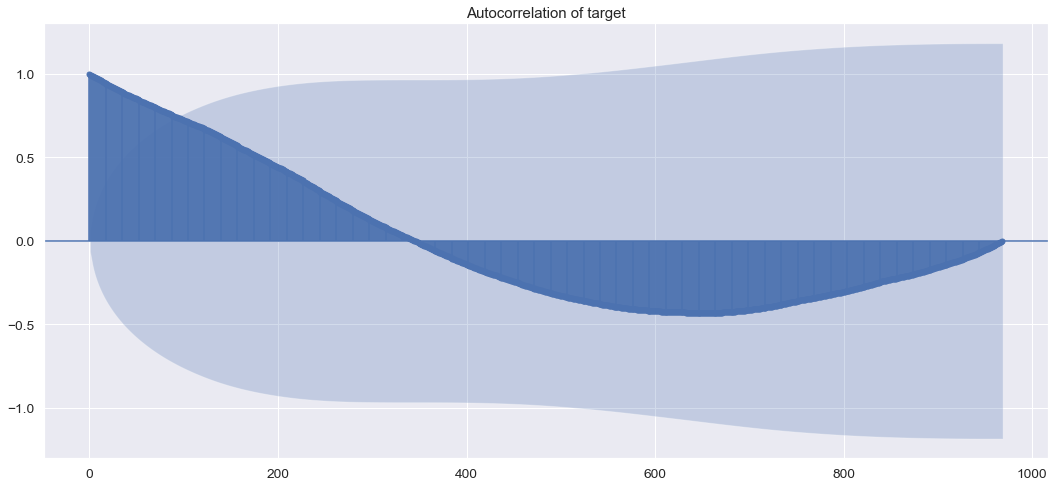

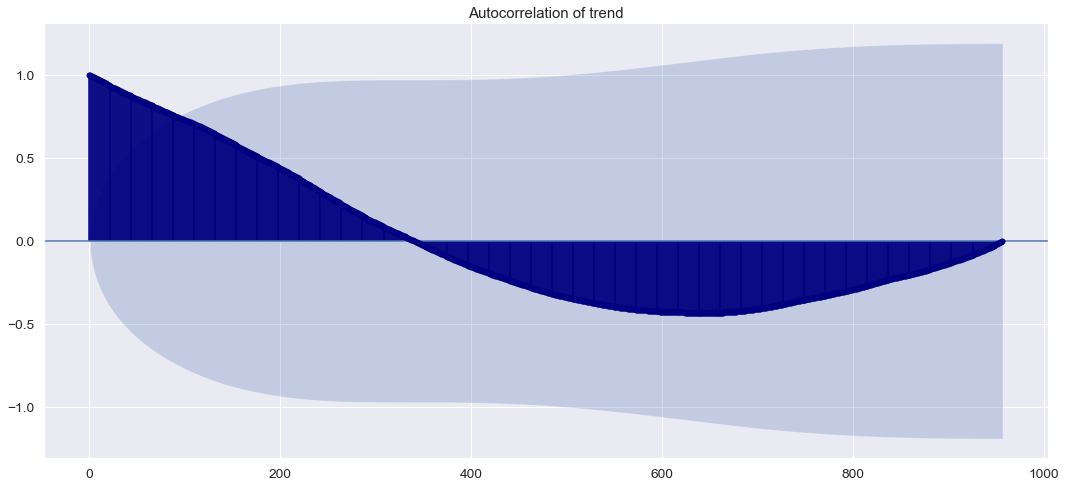

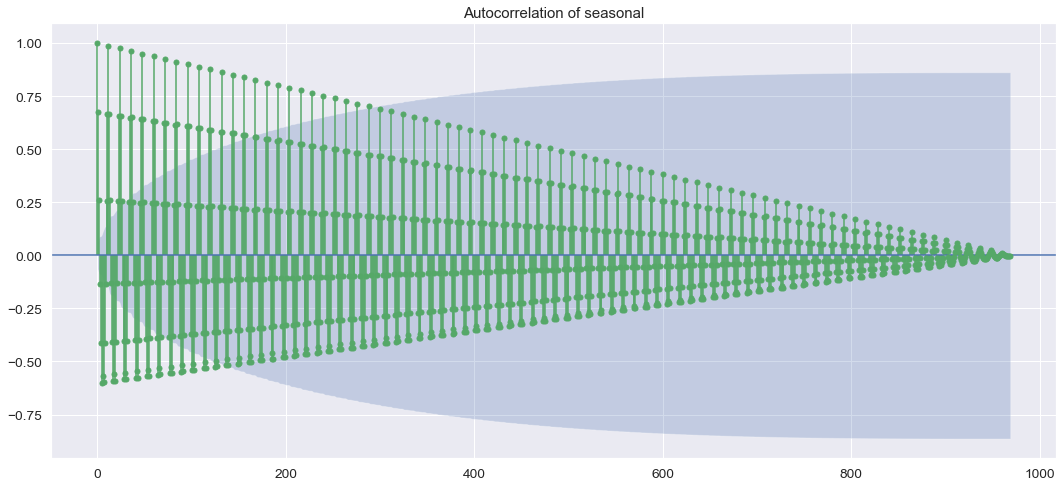

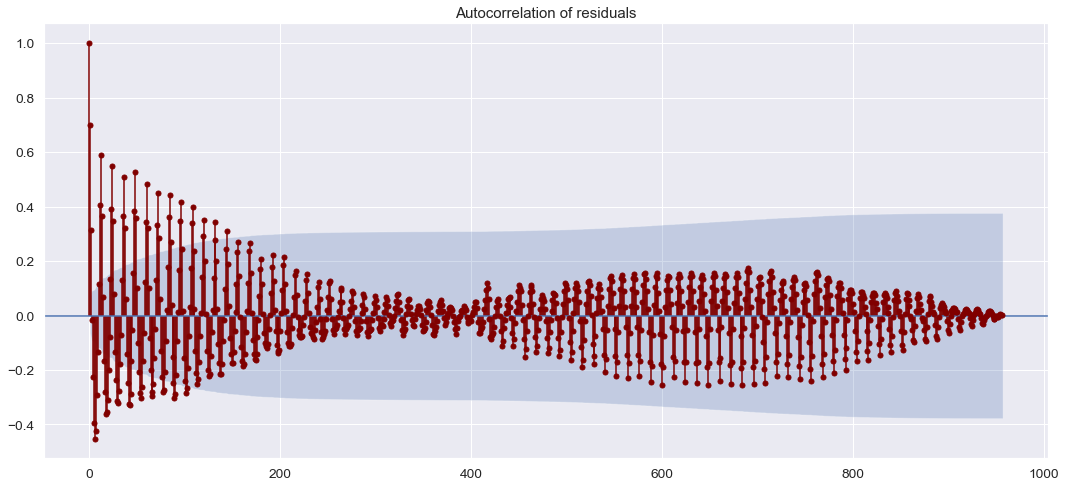

In [338]:
correlation_analysis(us_employment_observed, decomposition)

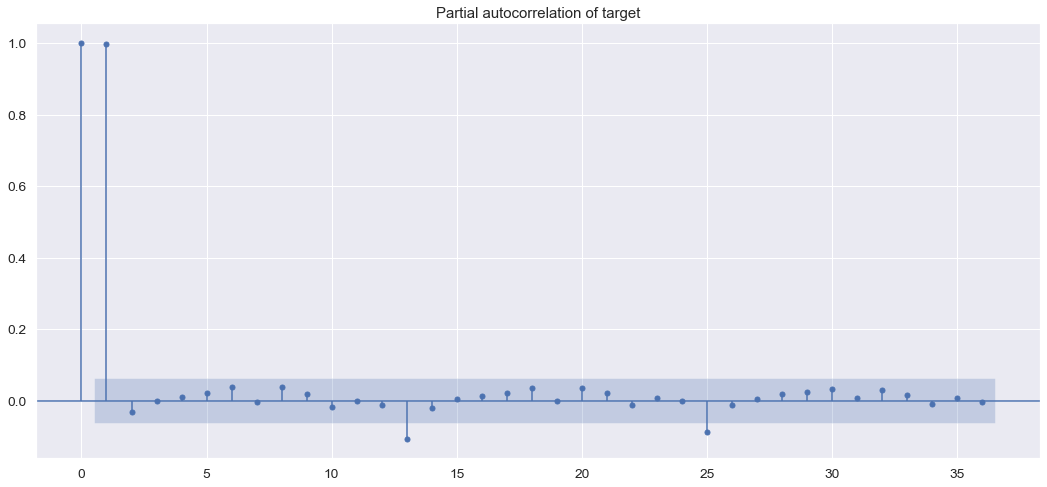

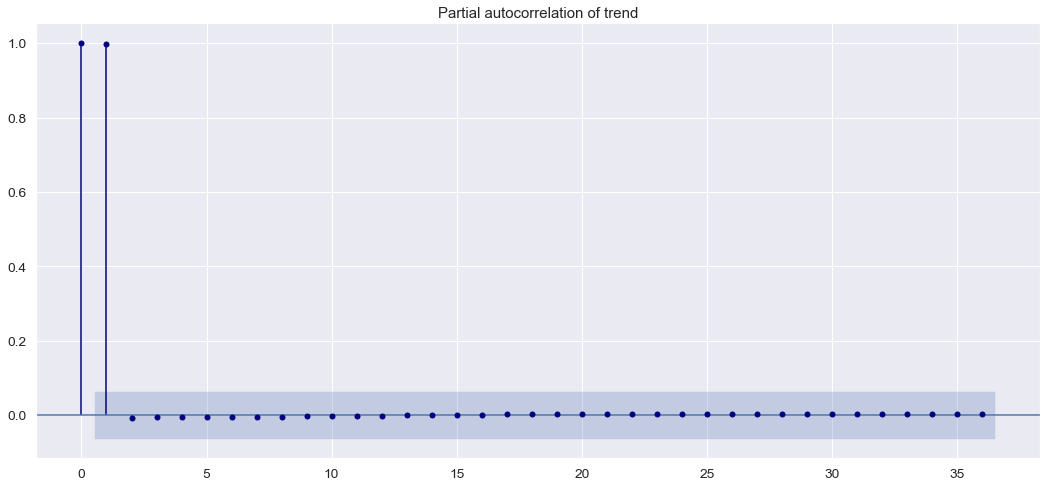

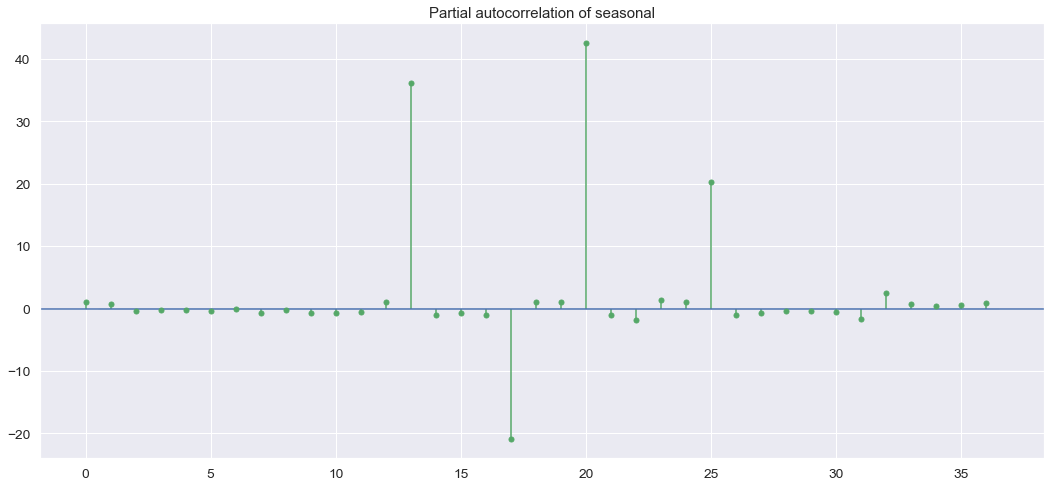

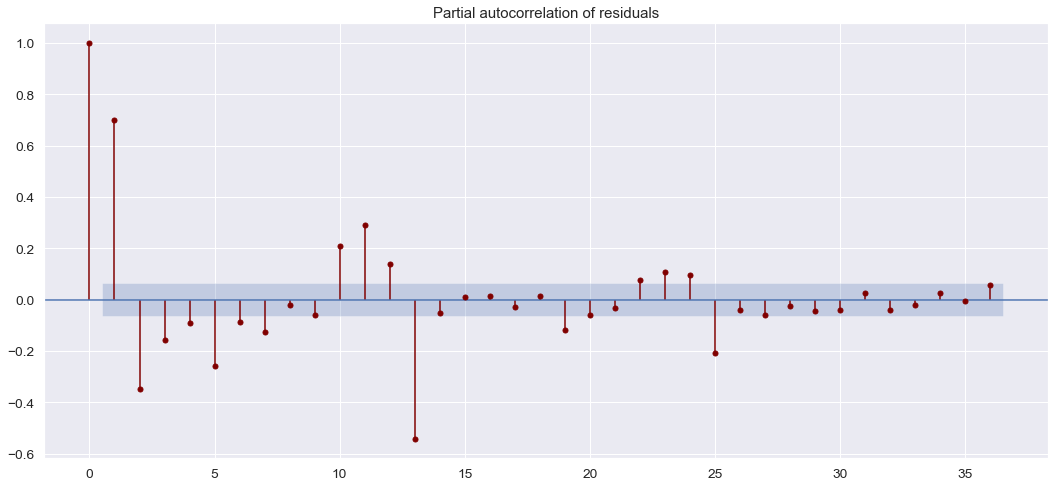

In [339]:
partial_autocorrelation(us_employment_observed, decomposition, 36)

1. we decompose series with trend, seasonal and residuals components. 
    * seasonal component looks strange, but i think it
    * residuals look very bad, not stationary series (without mean=0 and std=constant)
2. What do you learn about the series
    * many questions arrised while odserving this series. We should create better decomposition and detect cyclical component (for now i dont know how to do it :) )
3. What can you say about the seasonal patterns?
    * it is clear that from january to december we can catch uptrend but it feels down from december to january
4. Can you identify any unusual years?
    * I don't thing that there are any unysual years but there are cyclical component that we dont catch

## aus_production

In [451]:
aus_production.head()
# Bricks from aus_production

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956 Q1,284,5225.0,189.0,465,3923,5
1,1956 Q2,213,5178.0,204.0,532,4436,6
2,1956 Q3,227,5297.0,208.0,561,4806,7
3,1956 Q4,308,5681.0,197.0,570,4418,6
4,1957 Q1,262,5577.0,187.0,529,4339,5


In [449]:
qs = aus_production['Quarter'].str.replace(r'(\d+) (Q\d)', r'\1-\2')
qs

0      1956-Q1
1      1956-Q2
2      1956-Q3
3      1956-Q4
4      1957-Q1
        ...   
213    2009-Q2
214    2009-Q3
215    2009-Q4
216    2010-Q1
217    2010-Q2
Name: Quarter, Length: 218, dtype: object

In [450]:
index = pd.PeriodIndex(qs, freq='Q').to_timestamp()
index

DatetimeIndex(['1956-01-01', '1956-04-01', '1956-07-01', '1956-10-01',
               '1957-01-01', '1957-04-01', '1957-07-01', '1957-10-01',
               '1958-01-01', '1958-04-01',
               ...
               '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
               '2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01'],
              dtype='datetime64[ns]', name='Quarter', length=218, freq='QS-OCT')

In [452]:
aus_production_observed = aus_production.copy()
aus_production_observed.set_index('Quarter', inplace=True)
aus_production_observed = aus_production_observed.Bricks
aus_production_observed.index = index

In [454]:
aus_production_observed

Quarter
1956-01-01    189.0
1956-04-01    204.0
1956-07-01    208.0
1956-10-01    197.0
1957-01-01    187.0
              ...  
2009-04-01      NaN
2009-07-01      NaN
2009-10-01      NaN
2010-01-01      NaN
2010-04-01      NaN
Freq: QS-OCT, Name: Bricks, Length: 218, dtype: float64

In [455]:
aus_production_observed.isna().sum() / aus_production_observed.count() * 100

10.1010101010101

In [456]:
aus_production_observed[aus_production_observed.isna() == True]

Quarter
2005-07-01   NaN
2005-10-01   NaN
2006-01-01   NaN
2006-04-01   NaN
2006-07-01   NaN
2006-10-01   NaN
2007-01-01   NaN
2007-04-01   NaN
2007-07-01   NaN
2007-10-01   NaN
2008-01-01   NaN
2008-04-01   NaN
2008-07-01   NaN
2008-10-01   NaN
2009-01-01   NaN
2009-04-01   NaN
2009-07-01   NaN
2009-10-01   NaN
2010-01-01   NaN
2010-04-01   NaN
Freq: QS-OCT, Name: Bricks, dtype: float64

In [457]:
aus_production_observed.dropna(inplace=True)

In [458]:
px.line(aus_production_observed)

In [467]:
decomposition = seasonal_decompose(aus_production_observed, period=4, model='additive')

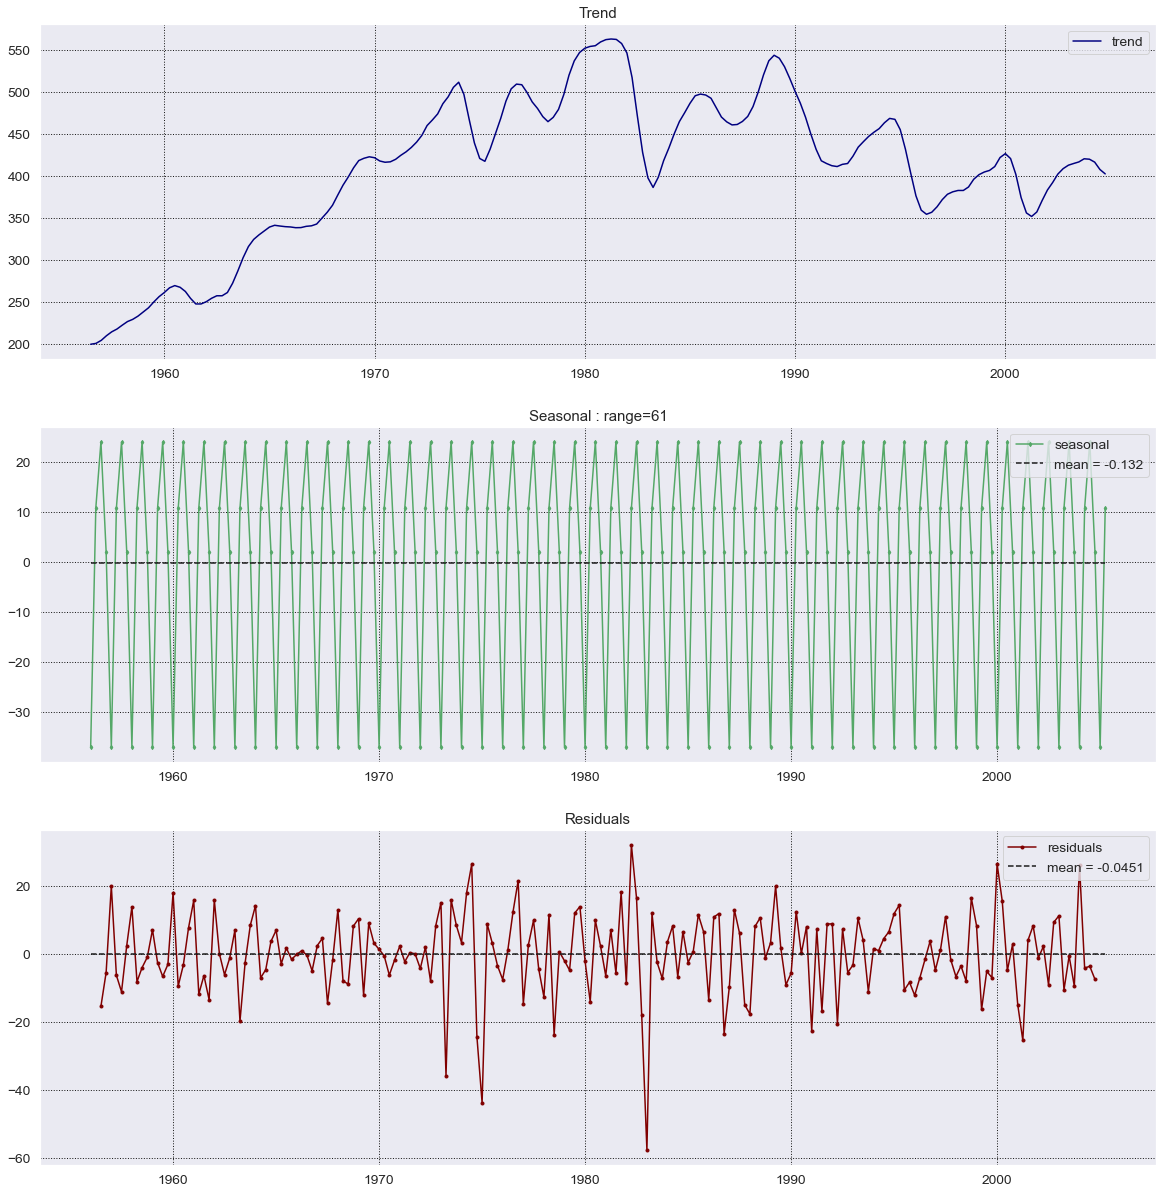

In [468]:
plot_decomposition(decomposition)

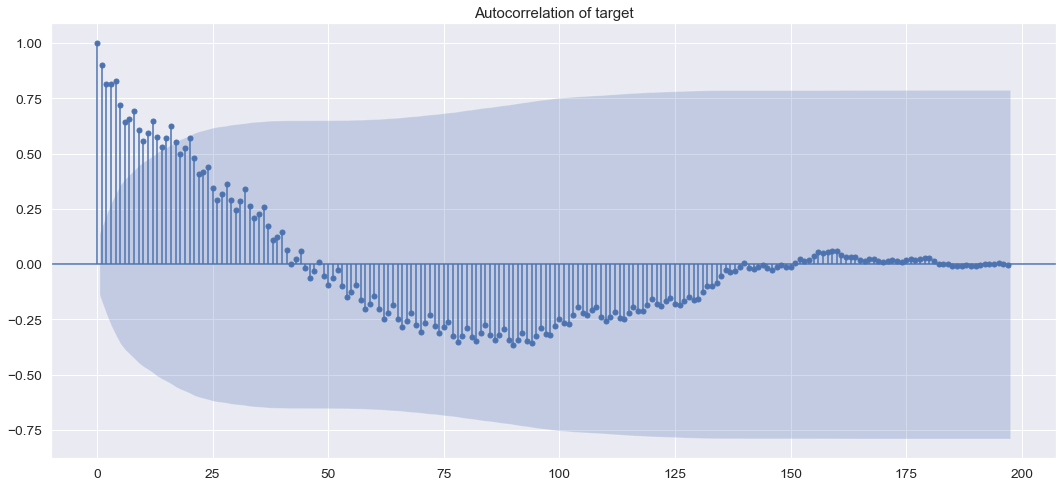

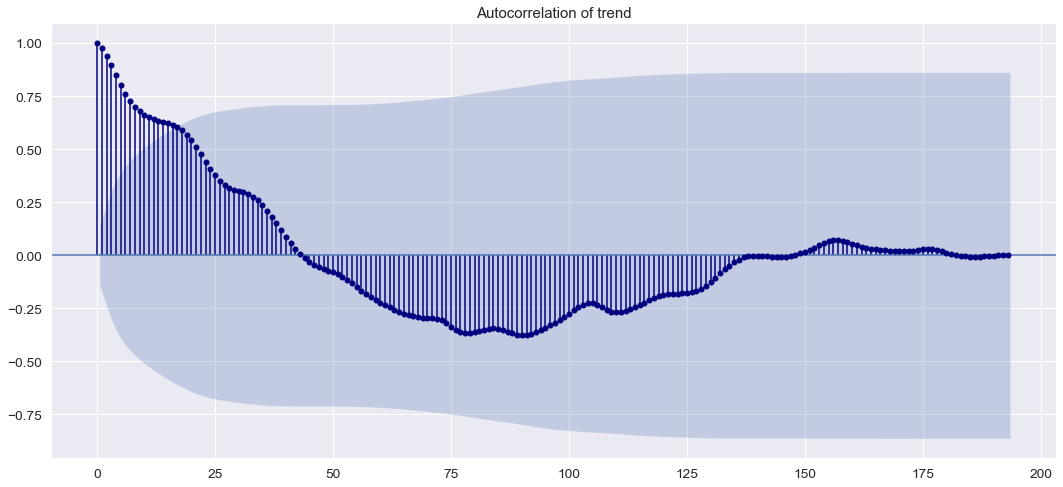

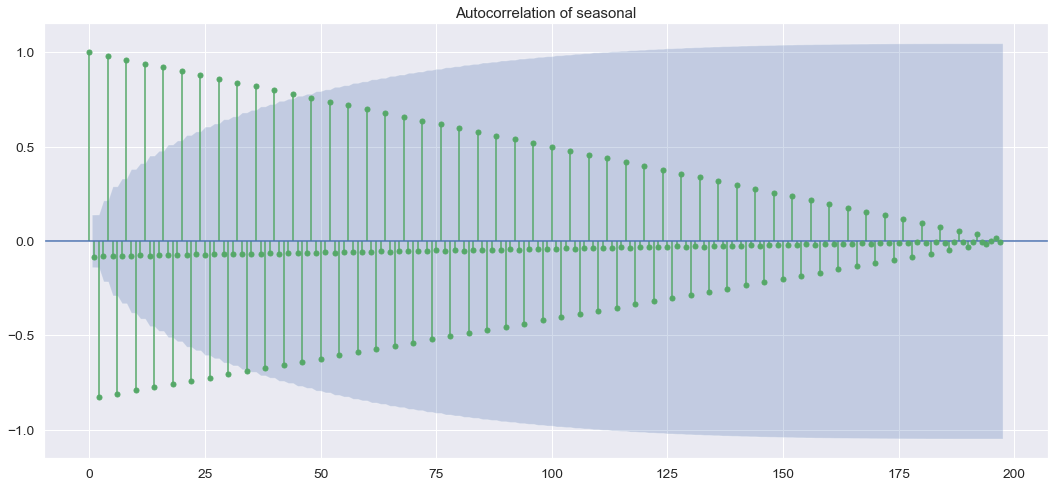

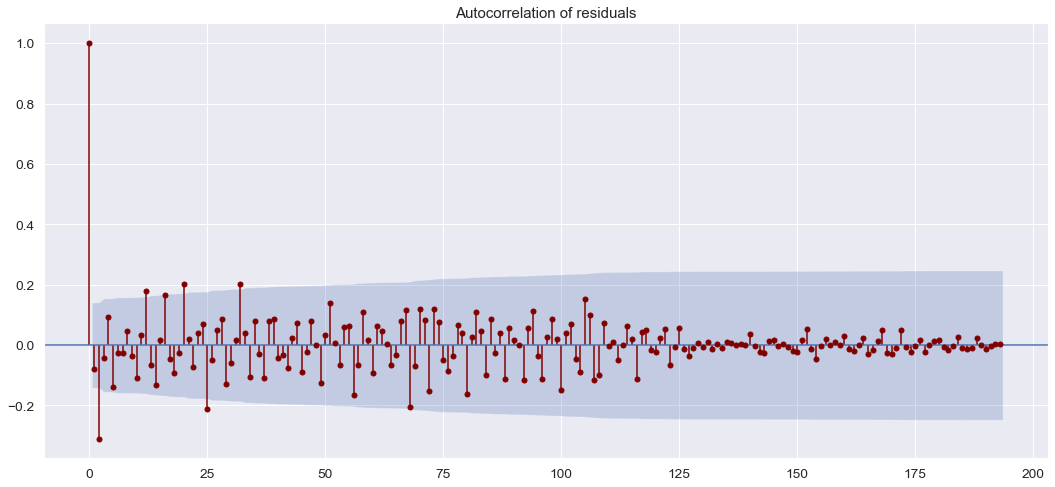

In [461]:
correlation_analysis(aus_production_observed, decomposition)

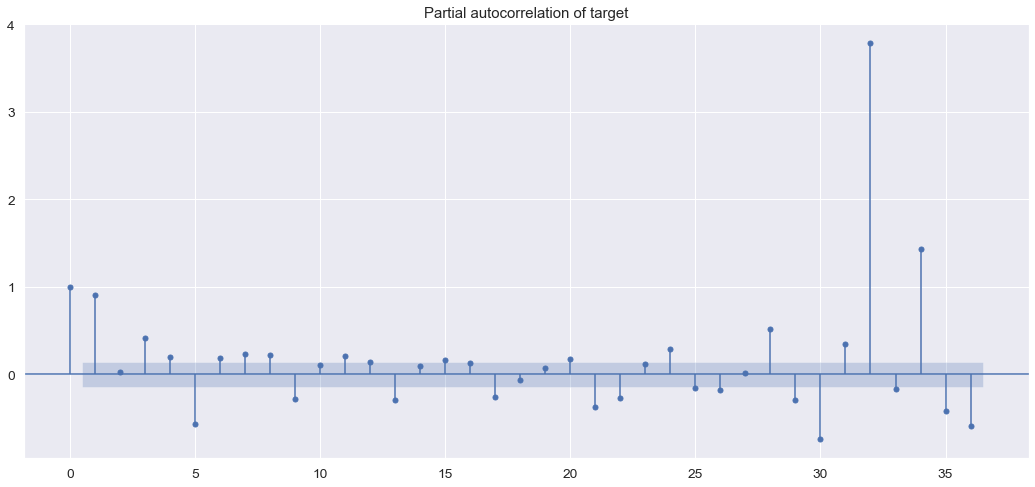

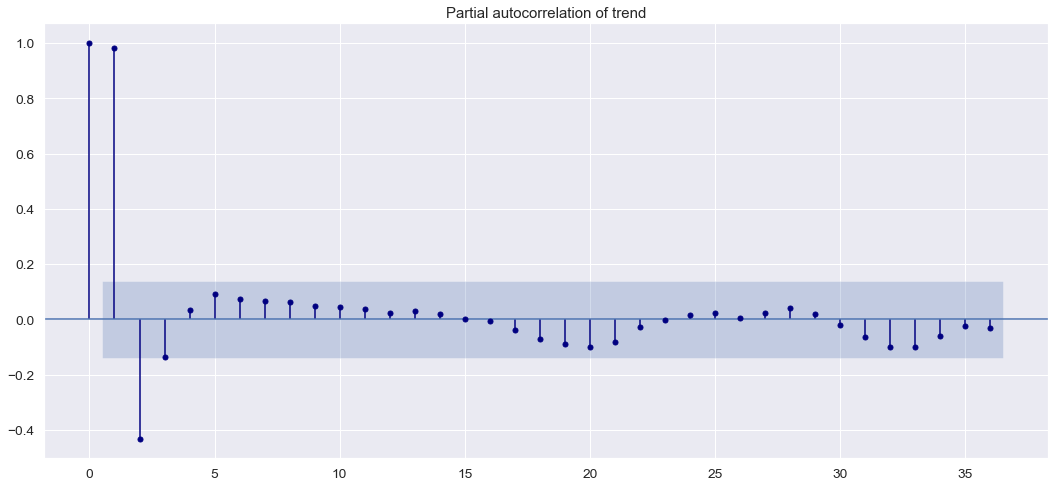

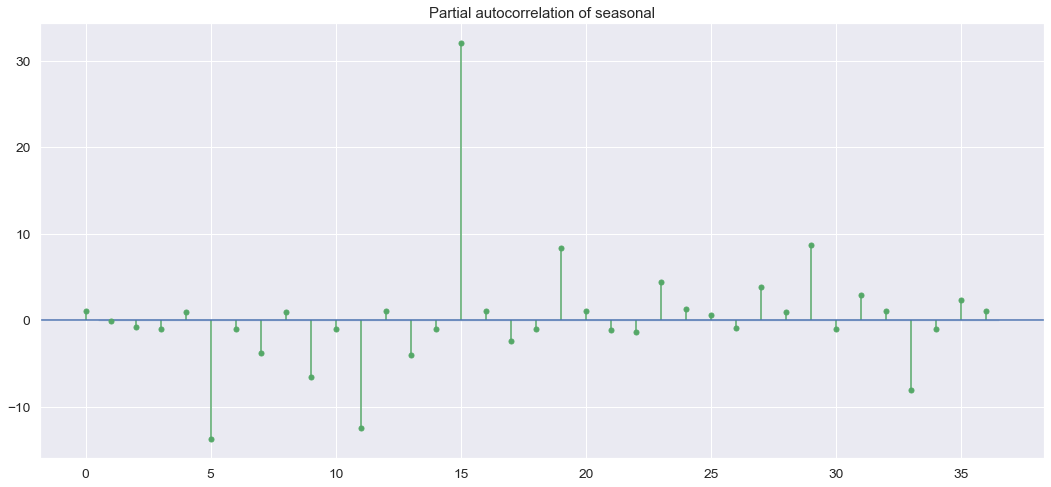

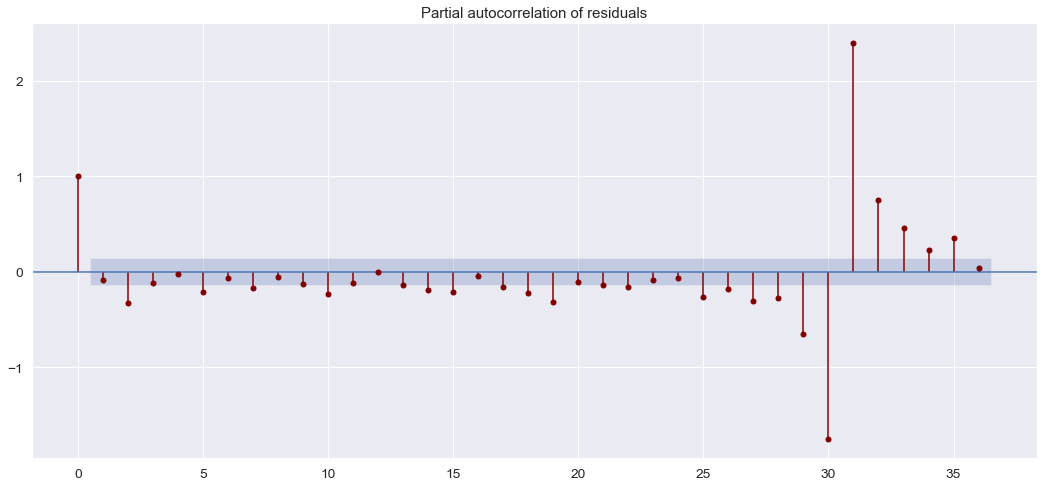

In [462]:
partial_autocorrelation(aus_production_observed, decomposition)

# Task 10

The following time plots and ACF plots correspond to four different time series. Your task is to match each time plot in the first row with one of the ACF plots in the second row.

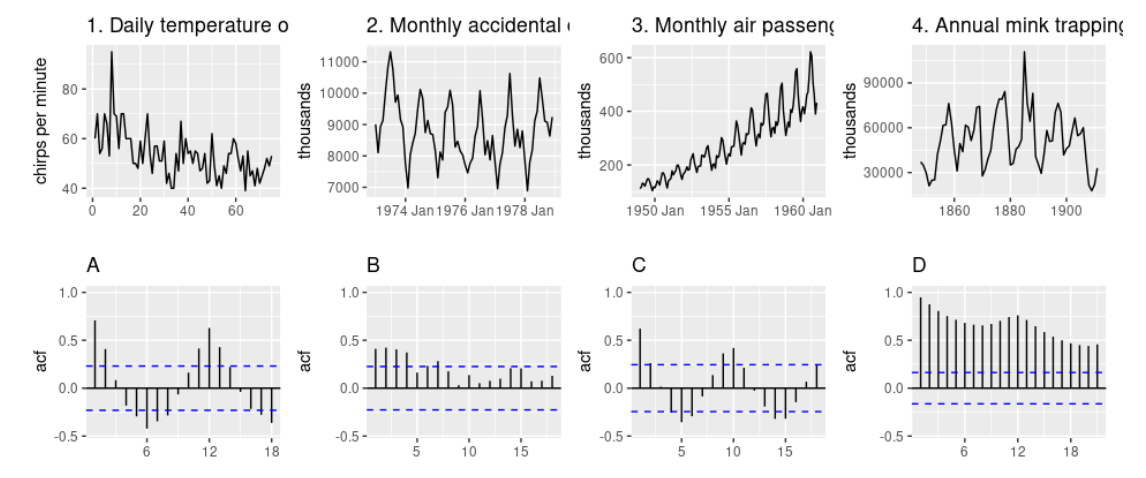

Answer: 
* 1 - b 
* 2 - a
* 3 - d
* 4 - c

# Task 11

The aus_livestock data contains the monthly total number of pigs slaughtered in Victoria, Australia, from Jul 1972 to Dec 2018. Use filter() to extract pig slaughters in Victoria between 1990 and 1995. Use autoplot() and ACF() for this data. How do they differ from white noise? If a longer period of data is used, what difference does it make to the ACF?



In [469]:
aus_livestock  = load_data('aus_livestock')

In [471]:
aus_livestock.head()

,Month,Animal,State,Count
0,1976 Jul,"Bulls, bullocks and steers",Australian Capital Territory,2300.0
1,1976 Aug,"Bulls, bullocks and steers",Australian Capital Territory,2100.0
2,1976 Sep,"Bulls, bullocks and steers",Australian Capital Territory,2100.0
3,1976 Oct,"Bulls, bullocks and steers",Australian Capital Territory,1900.0
4,1976 Nov,"Bulls, bullocks and steers",Australian Capital Territory,2100.0


In [472]:
aus_livestock.Animal.unique()

array(['Bulls, bullocks and steers', 'Calves', 'Cattle (excl. calves)',
       'Cows and heifers', 'Lambs', 'Pigs', 'Sheep'], dtype=object)

In [503]:
aus_livestock.State.unique()

array(['Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia'], dtype=object)

In [491]:
aus_livestock[(aus_livestock['Animal'] == 'Pigs')]

,Month,Animal,State,Count
20436,1972 Jul,Pigs,Australian Capital Territory,1700.0
20437,1972 Aug,Pigs,Australian Capital Territory,1500.0
20438,1972 Sep,Pigs,Australian Capital Territory,1700.0
20439,1972 Oct,Pigs,Australian Capital Territory,1500.0
20440,1972 Nov,Pigs,Australian Capital Territory,2000.0
...,...,...,...,...
24895,2018 Aug,Pigs,Western Australia,66000.0
24896,2018 Sep,Pigs,Western Australia,74900.0
24897,2018 Oct,Pigs,Western Australia,62000.0
24898,2018 Nov,Pigs,Western Australia,61600.0


In [505]:
aus_livestock_observed = aus_livestock[(aus_livestock['Animal'] == 'Pigs') & (aus_livestock.State == 'Victoria')]
aus_livestock_observed.index = pd.to_datetime(aus_livestock_observed.Month, format='%Y %b')
aus_livestock_observed = aus_livestock_observed[(aus_livestock_observed.index < '1995-01-01') & (aus_livestock_observed.index >'1990-01-01')]
aus_livestock_observed = aus_livestock_observed.Count

In [508]:
px.line(aus_livestock_observed)

In [509]:
decomposition = seasonal_decompose(aus_livestock_observed, period=12)

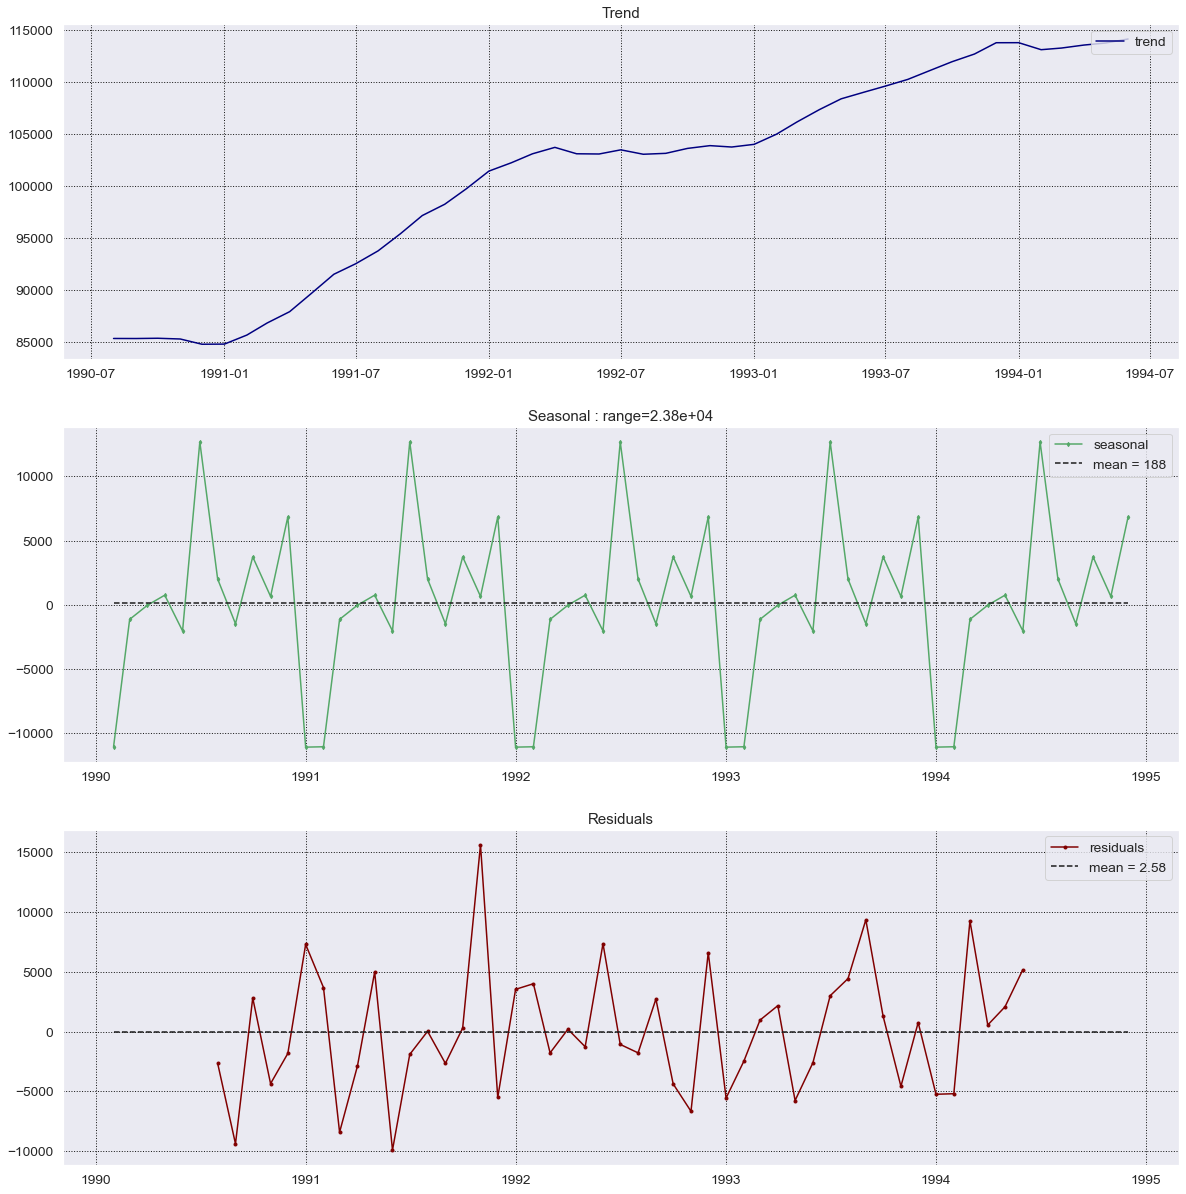

In [510]:
plot_decomposition(decomposition)

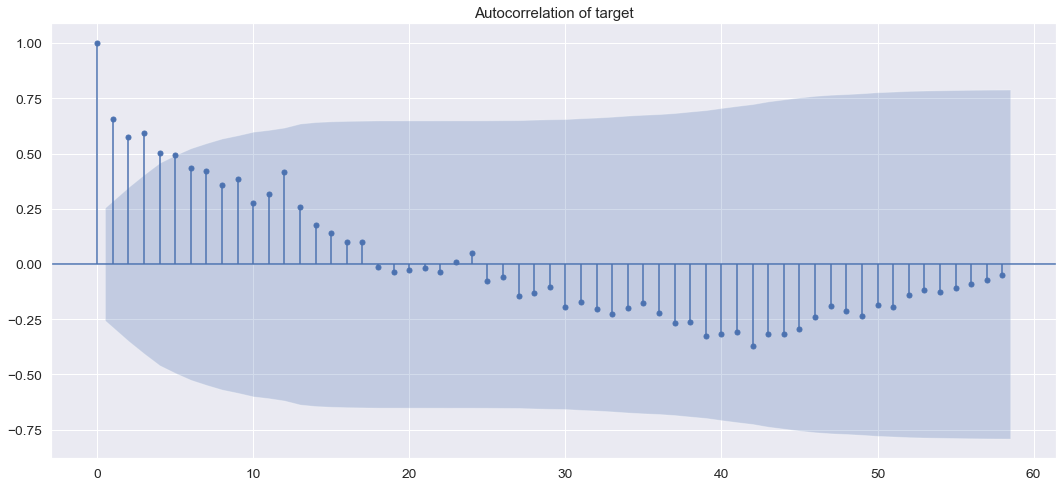

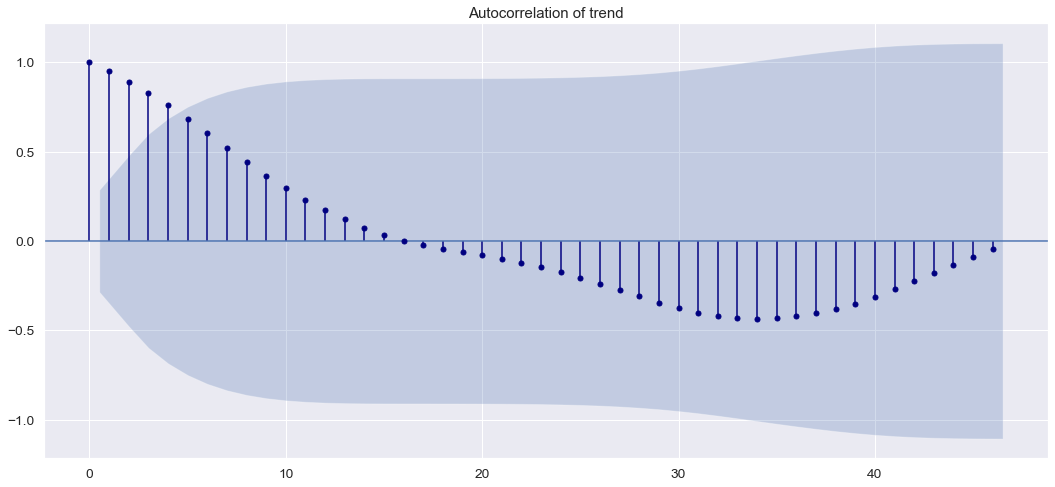

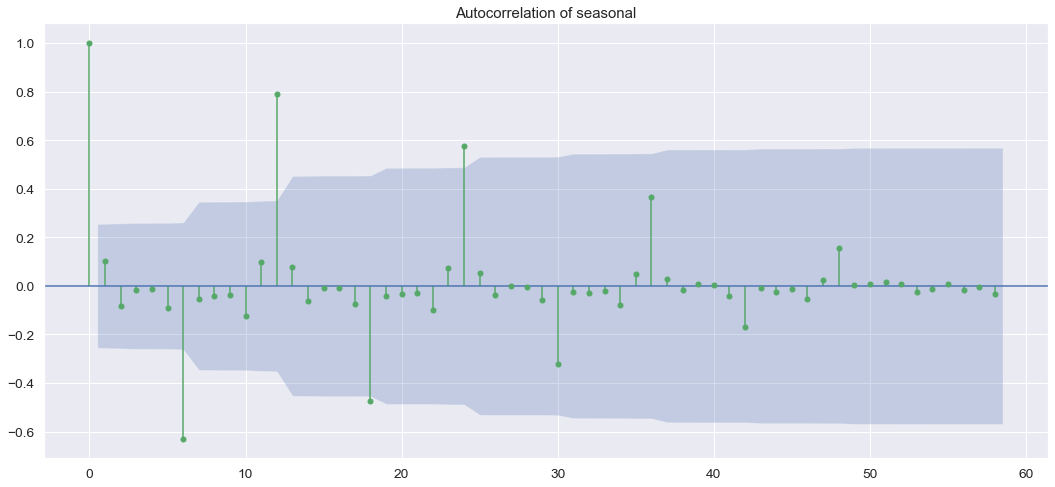

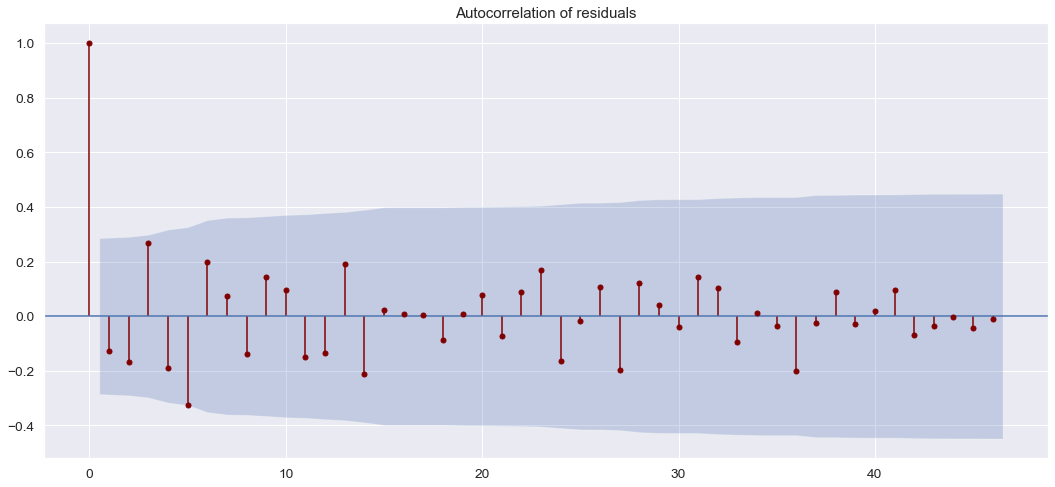

In [511]:
correlation_analysis(aus_livestock_observed, decomposition)

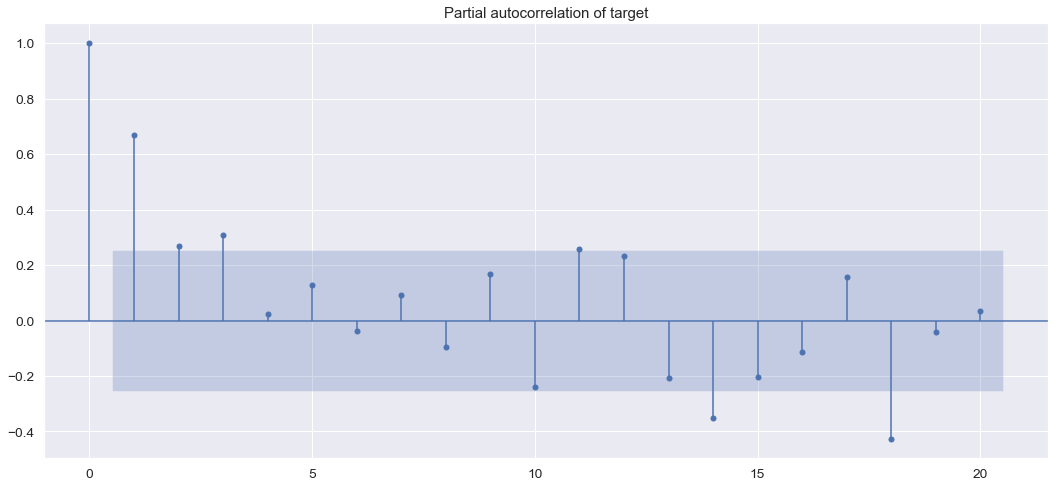

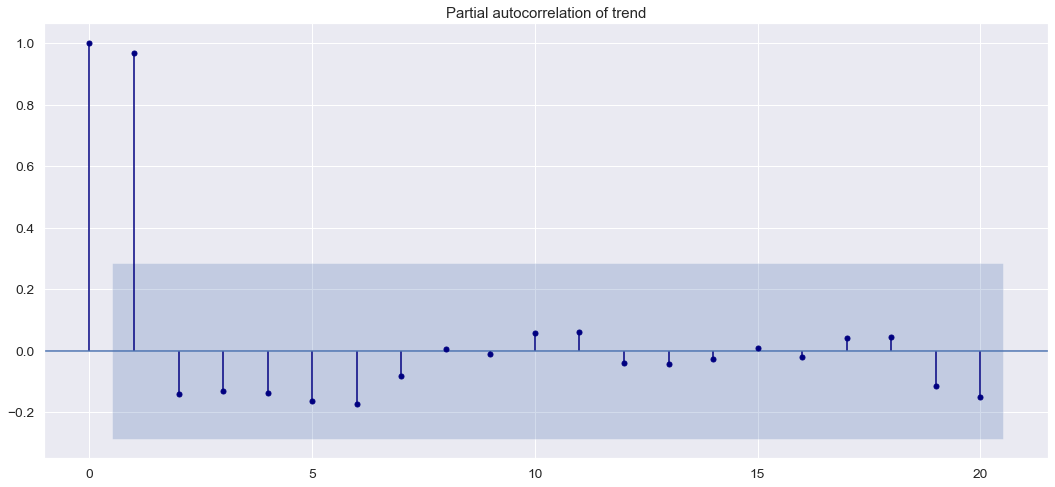

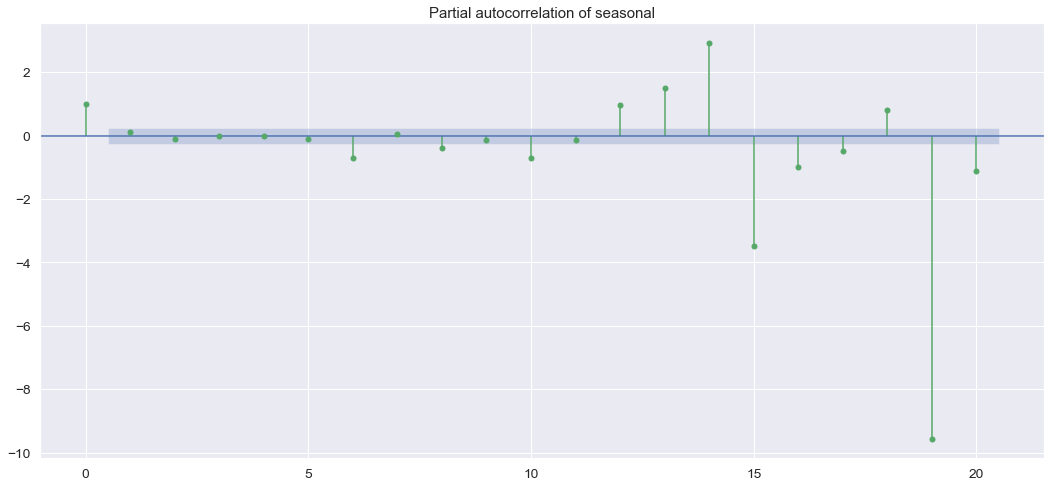

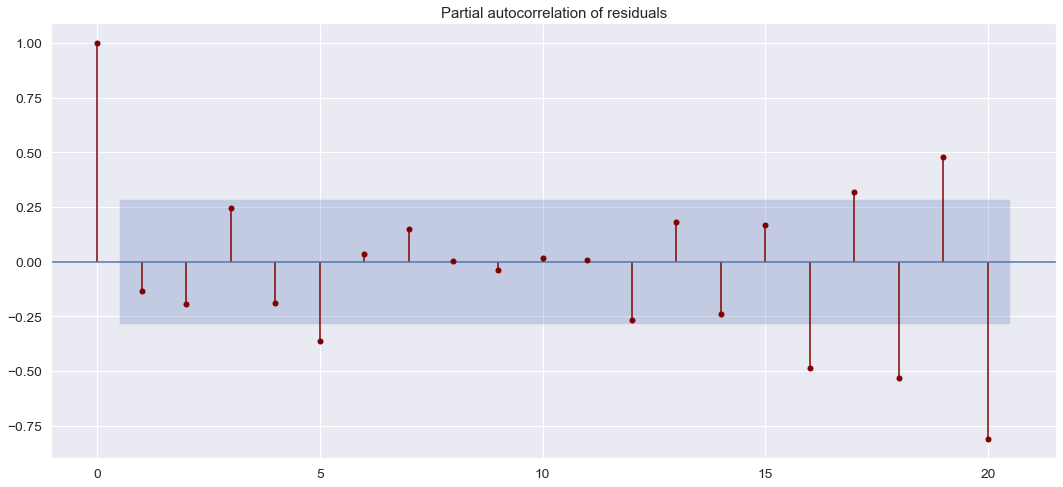

In [513]:
partial_autocorrelation(aus_livestock_observed, decomposition, lags=20)

All residuals lay under the confidence interval, it is good, but lest observe more detailed this part 

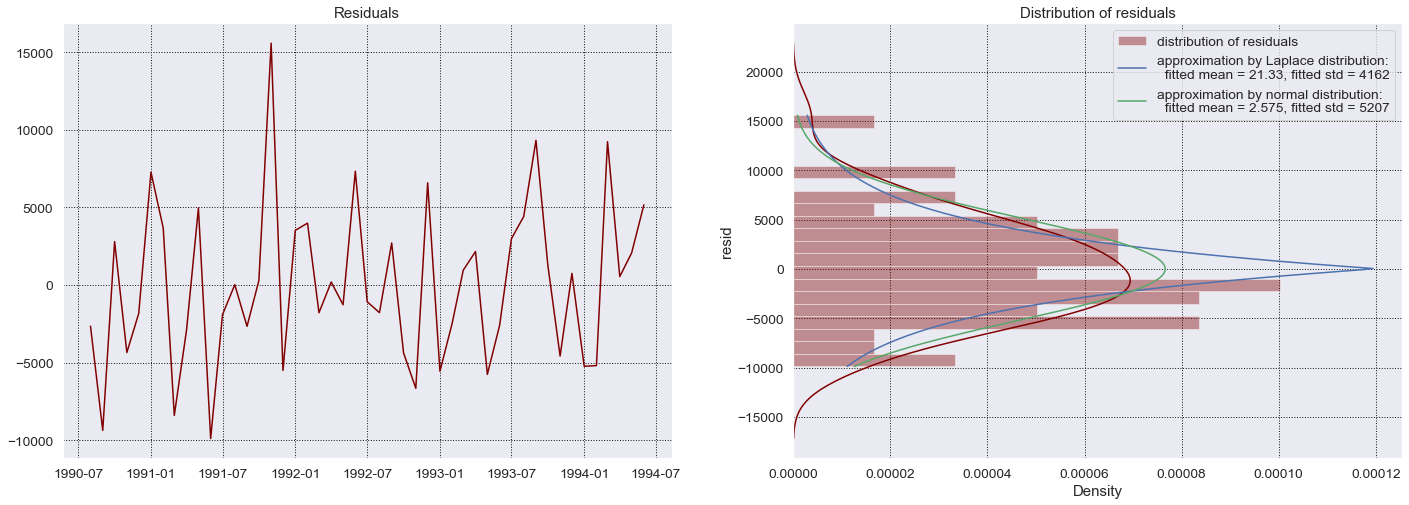

In [520]:
resid = decomposition.resid
color = 'maroon'

plt.subplots(1, 2, figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(resid, '-', color=color)
plt.grid(linestyle=':', color='k')
plt.title("Residuals")



x_fit = np.linspace(resid.min(), resid.max(), 201)
loc_laplace, scale_laplace = st.laplace.fit(resid.dropna())
loc_norm, scale_norm = st.norm.fit(resid.dropna())
# print(f"Fitting of residuals by Laplace distribution: fitted mean = {loc:.3f}, fitted std = {scale:.3f}")
y_fit_laplace = st.laplace.pdf(x_fit, loc_laplace, scale_laplace)
y_fit_norm = st.norm.pdf(x_fit, loc_norm, scale_norm)

plt.subplot(1, 2, 2)
sns.distplot(resid, color=color, bins=20, vertical=True, label="distribution of residuals")
plt.plot(y_fit_laplace, x_fit, '-b', 
         label=f"approximation by Laplace distribution:\n  fitted mean = {loc_laplace:.4g}, fitted std = {scale_laplace:.4g}")
plt.plot(y_fit_norm, x_fit, '-g', 
         label=f"approximation by normal distribution:\n  fitted mean = {loc_norm:.4g}, fitted std = {scale_norm:.4g}")
plt.legend()
# plt.ylim(resid-0.02*y_range, y_max+0.02*y_range)
plt.title("Distribution of residuals")
plt.grid(linestyle=':', color='k')

plt.show()

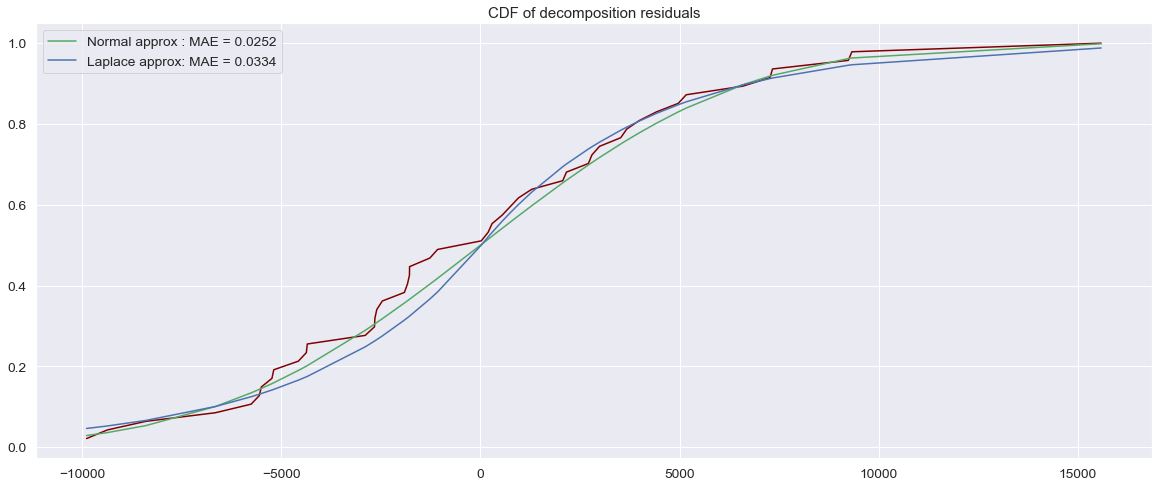

0.7545507162464334


In [525]:
ecdf_resid_instance = ECDF(resid.dropna())
resid_arr = resid.dropna().sort_values().values
ecdf_resid = ecdf_resid_instance(resid_arr)


cdf_norm = st.norm.cdf(resid_arr, loc=loc_norm, scale=scale_norm)
cdf_laplace = st.laplace.cdf(resid_arr, loc=loc_laplace, scale=scale_laplace)


mae_norm = mean_absolute_error(ecdf_resid, cdf_norm)
mae_laplace = mean_absolute_error(ecdf_resid, cdf_laplace)


plt.subplots(1, 1, figsize=(20, 8))
plt.plot(resid_arr, ecdf_resid, '-', color='maroon')
plt.plot(resid_arr, cdf_norm, '-g', 
         label=f"Normal approx : MAE = {mae_norm:.3g}")
plt.plot(resid_arr, cdf_laplace, '-b', 
         label=f"Laplace approx: MAE = {mae_laplace:.3g}")
plt.legend()
plt.title("CDF of decomposition residuals")
plt.show()

print(mae_norm/mae_laplace)

<AxesSubplot:xlabel='resid', ylabel='Density'>

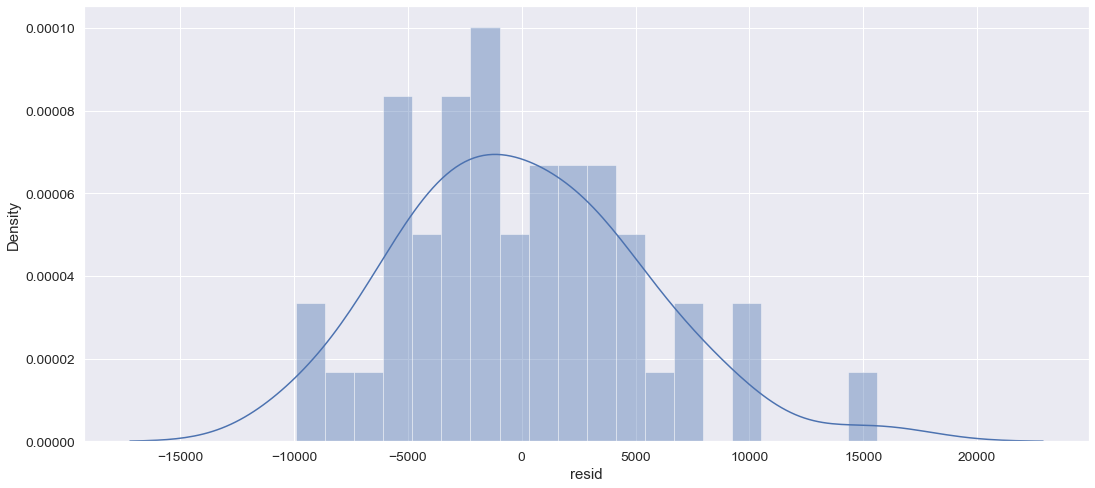

In [533]:
sns.distplot(resid, bins=20)

<AxesSubplot:xlabel='resid', ylabel='Density'>

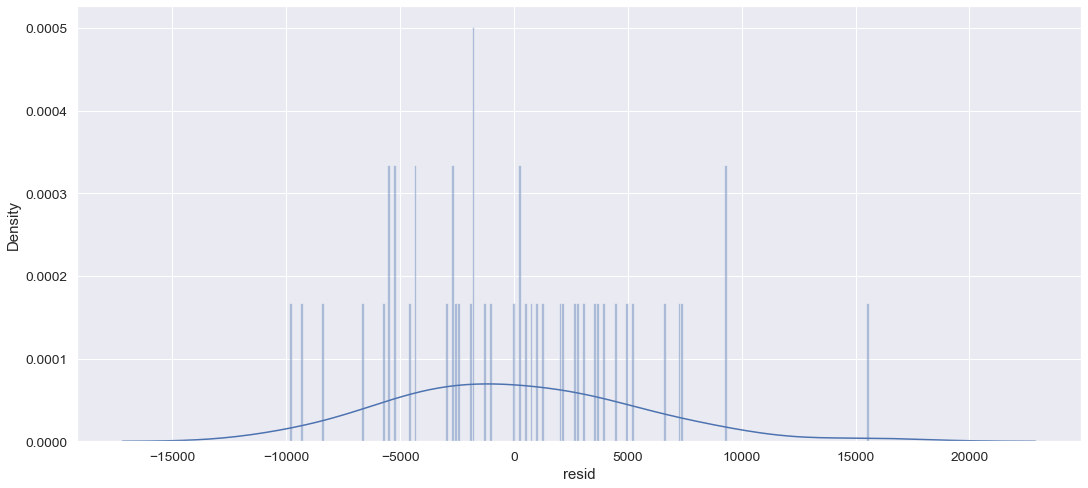

In [536]:
sns.distplot(resid, bins=200)

So, i think residuals looks like a normal dist, but we should mention that there is a really big std